In [14]:
import tensorflow as tf

In [15]:
DATA_DIR = "/hiragana"
IMG_SIZE = (64,64)
BATCH_SIZE = 32

In [17]:
# create datasets

train = tf.keras.utils.image_dataset_from_directory(
    directory="hiragana",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)
validation = tf.keras.utils.image_dataset_from_directory(
    "hiragana",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 544 files belonging to 47 classes.
Using 436 files for training.
Found 544 files belonging to 47 classes.
Using 108 files for validation.


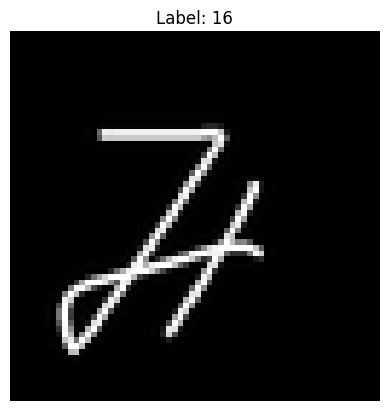

In [18]:
# Sample plotting test of data

import matplotlib.pyplot as plt
for images, labels in train.take(1):
    first_image = images[0].numpy().astype("uint8")
    first_label = labels[0].numpy()
    break

plt.imshow(first_image, cmap="gray")
plt.title(f"Label: {first_label}")
plt.axis("off")
plt.show()

In [19]:
# Normalize data and create the model
class_names_list = train.class_names

normalization = tf.keras.layers.Rescaling(1./255)
train_ds = train.map(lambda x,y: (normalization(x), y))
validation_ds = validation.map(lambda x,y: (normalization(x), y))


model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(class_names_list), activation="softmax")
])


In [20]:
# Compile and fit model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.1330 - loss: 3.6171 - val_accuracy: 0.2222 - val_loss: 3.0102
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4472 - loss: 2.0759 - val_accuracy: 0.6019 - val_loss: 1.9215
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7408 - loss: 0.9304 - val_accuracy: 0.6667 - val_loss: 1.2737
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9151 - loss: 0.3137 - val_accuracy: 0.7500 - val_loss: 1.0801
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9564 - loss: 0.1231 - val_accuracy: 0.7222 - val_loss: 1.3162
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9771 - loss: 0.0660 - val_accuracy: 0.7778 - val_loss: 1.3196
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9977 - loss: 0.0173 - val_accuracy: 0.8056 - val_loss: 1.1251
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9931 - loss: 0.0263 - val_accuracy: 0.7870 - v

In [21]:
test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

4/4 - 0s - 25ms/step - accuracy: 0.7963 - loss: 1.2503


In [22]:
model.save("hiragana_model.keras")